### This notebook performs a simulation of diagonalizatin GWW DBI simulation in the Gaussian case for the 2d Anderson model

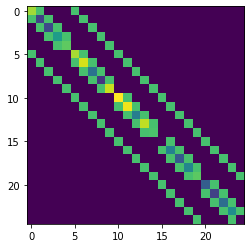

In [1]:
from scipy.linalg import expm
import numpy as np
import matplotlib.pyplot as plt
import time

# System size
L = 5

# Trivial initialization of the right size matrix
hamiltonian_name = "Gaussian_2d_NN_OBC_L_" +str(L)
H_NN = np.zeros( L ) 

H_NN = np.diag([1]*(L-1),1)
H_NN = H_NN + H_NN.T

#https://stackoverflow.com/a/50566733
from scipy.linalg import block_diag
H_2d = block_diag(*( [H_NN+ 1.5 * np.diag(np.random.rand(L)) for l in range(L)] ))

for r in range(L-1):
    for c in range(L):
        H_2d[c+r*L,c+r*L+L] = 1
        H_2d[c+L*r+L,c+L*r] = 1
plt.imshow(H_2d)

In [2]:
print (H_2d.diagonal())

[1.21459077 0.27367528 0.31075192 0.78069986 1.05875997 1.22466761
 1.31865345 0.53682766 0.21937464 1.2973853  1.41138626 1.38171479
 0.60413521 1.27610371 1.00976096 0.01328293 0.62721031 0.39805282
 0.65048976 1.05546035 0.42131416 0.27742212 0.50909245 0.70551138
 0.02082284]


In [11]:
from class_double_bracket_flow import *

flow = double_bracket_flow( H_2d)

flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True

flow.nmb_search_points_minimizing_s_search = 170
flow.flow_step_max = 0.45
flow.nmb_flow_steps = 20
flow.please_use_binary_search =  False
flow.please_compute_observables = False
flow.flow_generator['operator']

Flow step  0  using H with norm  9.932295434793009
    Found minimum norm =  7.478736753161086  for s =  0.4260355029585799
Flow step  1  using H with norm  9.932295434793007
    Found minimum norm =  6.248303905620079  for s =  0.12248520710059171
Flow step  2  using H with norm  9.932295434793007
    Found minimum norm =  5.551847216939124  for s =  0.06923076923076923
Flow step  3  using H with norm  9.932295434793009
    Found minimum norm =  5.0524038457268325  for s =  0.07189349112426036
Flow step  4  using H with norm  9.932295434793009
    Found minimum norm =  4.6529463877787665  for s =  0.058579881656804736
Flow step  5  using H with norm  9.932295434793009
    Found minimum norm =  4.325675758841255  for s =  0.06124260355029586
Flow step  6  using H with norm  9.932295434793007
    Found minimum norm =  4.052068508213488  for s =  0.05325443786982249
Flow step  7  using H with norm  9.932295434793007
    Found minimum norm =  3.823647606295638  for s =  0.0532544378698224

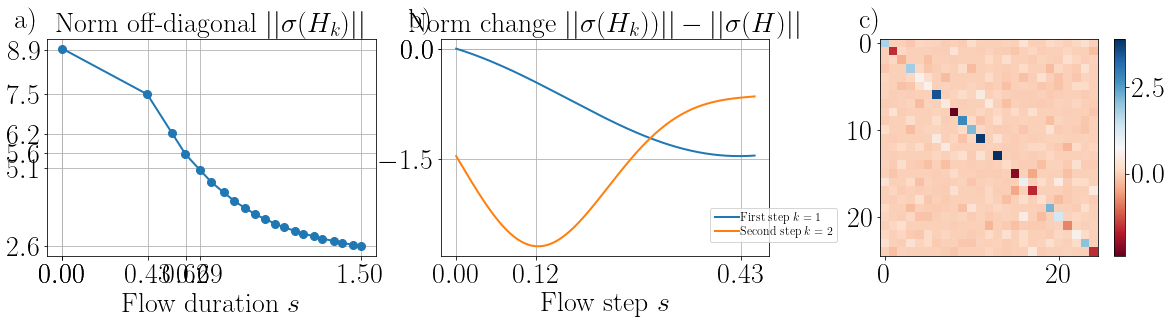

In [12]:
flow.flow_forwards( )
flow.show_flow_forwards_results()

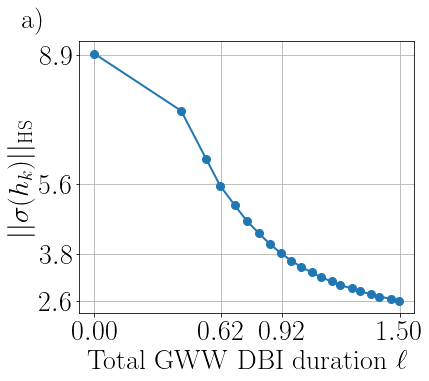

In [21]:
fontsize = 28
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['font.size'] = fontsize
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.labelspacing'] = .3
plt.rcParams['legend.columnspacing']= .3
plt.rcParams['legend.handletextpad']= .1
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"


self = flow

flow_results = self.flow_outputs

f=plt.figure(figsize = ( 6,5 ))
#a        

#plot data
norms = flow_results['minimal_norm_sigma_H_s']
x_axis = [sum(flow_results['minimizing_flow_step'][:k]) for k in range( 1, len(flow_results['minimizing_flow_step'])+1)]
#plot
plt.plot( x_axis, norms, '-o')   


#axis labels
x_labels_rounded = [ round(x, 2 ) for x in x_axis ]
x_labels_rounded = [ x_labels_rounded[x] for x in [0,3,8]] + [max(x_labels_rounded)]

plt.xticks(x_labels_rounded)

y_labels_rounded = [ round(y, 1 ) for y in norms ]
y_labels_rounded = [ y_labels_rounded[y] for y in [0,3,8]] + [min(y_labels_rounded)]
plt.yticks(y_labels_rounded)

plt.grid()

plt.xlabel(r'$\mathrm{Total~GWW~DBI~duration~} \ell$')
plt.ylabel(r'$\vert\vert\sigma( h_k)\vert\vert_{\mathrm{HS}}$')
#plt.title(r'GWW DBI')

#panel label
a =-.17
b = 1.05
plt.annotate('a)', xy = (a,b), xycoords='axes fraction')


save_path = 'figs/2d_anderson_norms_'+str(flow.nmb_flow_steps)+'_L_'+str(L)+'.pdf'
plt.savefig( save_path, format='pdf')
plt.show()


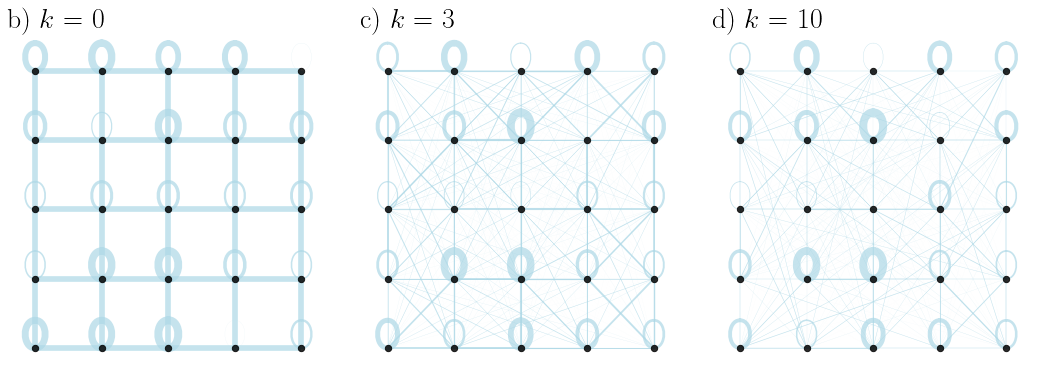

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import networkx as nx

fig = plt.figure(figsize=(20,6))


it = 0
pos = {}
for r in range(L):
    for c in range(L):
        pos[it] = [r+0.3,c+0.3]
        it = it + 1


subset_H = [0,2,9]
label = [ 'b)','c)', 'd)','e)', 'f)','g)','h)']
for x in range(3):
    ax = plt.subplot(1,4,x+2)
    if x == 0:
        G=nx.from_numpy_array(H_2d)
    else:
        G=nx.from_numpy_array((flow.flow_outputs['optimally_flowed_H'][subset_H[x]]))


    import networkx as nx
    from matplotlib import pyplot as plt

    widths = nx.get_edge_attributes(G, 'weight')
    nodelist = G.nodes()
    weigths_list = list(widths.values())
    weigths_draw = [8* w / max(weigths_list) for w in weigths_list]



    nx.draw_networkx_nodes(G,pos,
                           nodelist=nodelist,
                           node_size=40,
                           node_color='black',
                           alpha=0.83)
    nx.draw_networkx_edges(G,pos,
                           edgelist = widths.keys(),
                           width=weigths_draw,
                           edge_color='lightblue',
                           alpha=0.7)
    if 0:
        nx.draw_networkx_labels(G, pos=pos,
                            labels=dict(zip(nodelist,nodelist)),
                            font_color='white')
    a =0
    b = 1.0
    
    plt.annotate(str(label[x]) + r' $k$ = ' + str(subset_H[x]+( 0 if x == 0 else 1)), xy = (a,b), xycoords='axes fraction')

    plt.box(False)
plt.tight_layout()
save_path = 'figs/2d_anderson_graphs_'+str(flow.nmb_flow_steps)+'_L_'+str(L)+'.pdf'
plt.savefig( save_path, format='pdf')
plt.show()
